# Thesis Notes

## Introduction

The motivation behind statistical learning is to identify the relationship between variables using observations or realized datasets. Particularly, the relationship between the independent variables and the depended variable or the input and the output. Let $Y$ be the output or the response and $X_{1}, X_{2}, \ldots , X_{p-1}, X_{p}$ be the inputs or the predictors. Generally, we can assume that this relationship can be expressed into the following general form $$Y = F(X) + \epsilon.$$ Here, $X = X_{1}, X_{2}, \ldots , X_{p-1}, X_{p}$, $F$ is some fixed but unknown function of the predictors and $\epsilon$ be some random noise. In this form, $F$ represents the systematic information that the inputs provides about the output. Identifying or estimating $F$ is valueble as it will give us the ability to make predictions and inferences. \
In this research, we assume that the dataset is finite.

### Prediction

In many settings, the input variables or predictors has been observed and are readily available and we want to use it to predict the value or outome of the output or the response. In this case, we assume that the random error has a mean of $0$. We can then predict $Y$ using  $$\hat{Y} = \hat{F}(X),$$ where $\hat{F}$ is our estimate for $F$. For prediction, we are typically not concerned of the actual form of $\hat{F}$ as long as it produces the most accurate results. Generally, $\hat{F}$ will not be a perfect estimate of $F$, thus errors will be introduced. There are two types of error that affects the accuracy of $\hat{F}$:

- **Reducible Error**: Errors that can be further reduced to improve the affuracy of $\hat{F}$.
- **Irreducible Error**: Errors that is inherent in $Y$ and independent from $F$, like from $\epsilon$, thus cannot be further reduced.

If we fix $\hat{F}$ and $X$, so that the only variability comes from $\epsilon$. Then we can see that 
\begin{align*}
E[(Y-\hat Y)^2] &= E[ (F(X) + \epsilon - \hat F(X))^2 ]\\
&= \underbrace{[ F(X) - \hat F(X) ]^2}_{\text{Reducible}} + \underbrace{Var(\epsilon)}_{\text{Irreducible}}
\end{align*}
where $E[Y-\hat Y]$ is the expected squared difference between the predicted and actual value of $Y$, and $Var(\epsilon)$ represents the *variance* associated with the error term $\epsilon$.

### Inference

In this approach, we are more interested in the actual form of $F$. Thus the estimated form, $\hat{F}$, is important to know. Answering the following guide questions might be important to know:

- What predictors are associated with the response?
- What is the relationship between the response and each predictor?
- Can the relationship between Y and each predictor be adequately summarized using a linear equation, or the relationship is more complicated?

### Estimating $F$

#### Loss Function
In statistical learning, the loss function, also known as the objective/error/cost function, is one of the most important aspects in estimating a function. The 'loss' is the measure of how good our model's prediction is to the to the actual value and we can get the value of this measure by defining a loss function. The most frequently employed loss functions include squared-error $l(y_{actual}, y_{predicted}) = (y_{actual} - y_{predicted})$ and absolute error $l(y_{actual}, y_{predicted}) =|y_{actual} - y_{predicted}|$ for regression and negative binomial log-likelihood $l(y_{actual}, y_{predicted}) =log(1+ e^{2y_{actual}y_{predicted}})$ for classification. [IBM](https://www.ibm.com/think/topics/loss-function) Friedman. Now, one way to measure of how good the estimated model $F'(x)$ is given the training data $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$ is called the empirical risk given by $$L(F'(x)) = \dfrac{1}{n}\sum_{i=1}^{n} l(y_i,F'(x_i))$$ which is the average loss of the estimated model $F'(x)$ over the dataset. [Stanford](https://ee104.stanford.edu/lectures/erm.pdf) \
The loss function gives us a measurable guide in estimating $F$. That is, if we let $x_{ij}$ be the value of the jth predictor for observation $i$, where $i = 1,2,\ldots,n$ and $j=1,2,\ldots,p$ and let $y_{i}$ be the value of the response variable for the ith observation. Generally, to estimate $F$ using the training dataset $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$ where $x_i=(x_{i1},x_{i2},\ldots,x_{ip})^T$, we need to apply statistical learning methods to find a function $\hat{F}$ such that it miminizes the empirical risk. However, we must be careful on this regard since minimizing the empirical risk alone may lead to overfitting, which can make our estimate perform worse [Ying](https://www.researchgate.net/publication/331677125_An_Overview_of_Overfitting_and_its_Solutions), we will introduce safeguards later on to prevent this. Most statistical learning methods can be characterized as either *parametric* or *non-parametric*.

#### Parametric
In a parametric approach, we usually assume the form of the actual function $F$ which reduces the problem of estimating it into a numerical optimization problem. In other words, in a parametric approach, if we want to estimate some function $F(x)$ using a training dataset $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$, we choose some parametrized function $F'(x;\phi)$ and solve for the optimal parameters 
\begin{align*}
\phi^* &= \arg\min_{\phi} L(\phi) \\
&= \arg\min_{\phi} \dfrac{1}{n}\sum_{i=1}^{n} l(y_i,F'(x_i;\phi))
\end{align*} 
where $L(\phi)$ is the empirical risk (which would be a function of the parameters $\phi$) and $l(y_i,F'(x_i;\phi))$ is the defined loss function. Most of the time, we can solve for the parameters $\phi^*$ using numerical optimization methods. Once obtained, our estimate for $F(x)$ is given by: $$F(x) \approx F'(x;\phi^*).$$ *insert example

#### Non-Parametric
In a non-parametric approach, we do not presuppose a specific functional form for the underlying function $F$. Instead, the form of $F$ is inferred directly from the data, allowing for a flexible model that can adapt to the data's structure. Non-parametric methods are data-driven, meaning that the complexity of the model typically grows with the size of the dataset. \
To estimate $F$, we focus on constructing an appropriate function $F'(x)$ that accurately describes the relationship between the predictor $x$ and the target variable $y$, without parameterizing it in a fixed form. A general goal is to minimize a loss function, often expressed as: $$\phi(F') = \sum_{i=1}^{n} l(y_i,F'(x_i))$$ given the data $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$.

In practice, non-parametric approaches can involve methods like:

- K-Nearest Neighbors (KNN): Estimates the function $F$ by averaging the outputs of the nearest neighbors for a given data point.
- Kernel Methods: Use kernel functions to weigh nearby observations more heavily, such as Kernel Density Estimation for density estimation.
- Smoothing Splines: Fit smooth curves to data by balancing between fit and smoothness, often involving some optimization in function space.

While some non-parametric techniques do involve optimization (like smoothing splines), they often focus on the selection and application of local properties or constraints inferred from the data, rather than on a global parametric form. 

**Sources:**
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. Springer Science & Business Media.
- Wasserman, L. (2006). *All of Nonparametric Statistics*. Springer Science & Business Media.
- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.


#### Supervised vs. Unsupervised

#### Trade-Off Between Accuracy vs. Interpretability 

#### Model Accuracy and Bias-Variance Trade-Off

## Tree-Based Methods

### Regression Trees

Decision trees stratifies or segments the predictor space into a number of simple regions. To make predictions or classifications, we typically use the mean or the mode of the values of the observations/training data in the predictor region. It can be visualized by the following plot.

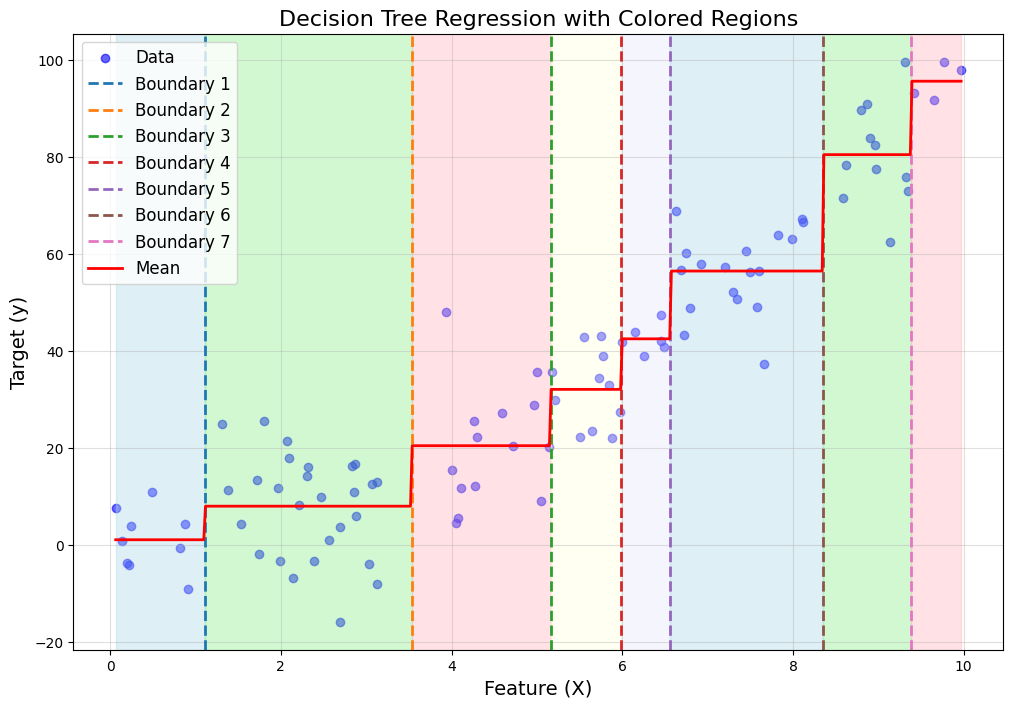

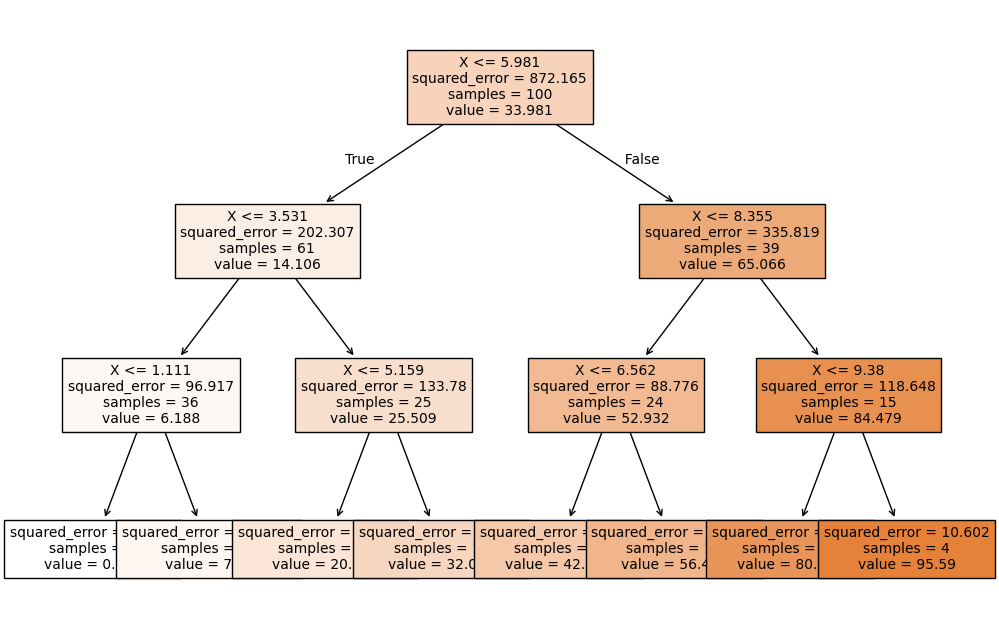

In [224]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = np.random.rand(100, 1) * 10
y = X.ravel() ** 2 + np.random.randn(100) * 10

regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor.fit(X, y)

x_min, x_max = X.min(), X.max()
x_grid = np.linspace(x_min, x_max, 500).reshape(-1, 1)
y_pred = regressor.predict(x_grid)

thresholds = np.sort(regressor.tree_.threshold[regressor.tree_.threshold > 0])

colors = ListedColormap(["lightblue", "lightgreen", "lightpink", "lightyellow", "lavender"])

plt.figure(figsize=(12, 8))
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)

for i in range(len(thresholds) + 1):
    if i == 0:
        region_start = x_min
    else:
        region_start = thresholds[i - 1]
    
    if i == len(thresholds):
        region_end = x_max
    else:
        region_end = thresholds[i]
    
    plt.axvspan(region_start, region_end, color=colors(i % len(colors.colors)), alpha=0.4)

for i, threshold in enumerate(thresholds):
    plt.axvline(x=threshold, color=f"C{i}", linestyle="--", linewidth=2, label=f"Boundary {i+1}")
plt.plot(x_grid, y_pred, label="Mean", color="red", linewidth=2)
plt.title("Decision Tree Regression with Colored Regions", fontsize=16)
plt.xlabel("Feature (X)", fontsize=14)
plt.ylabel("Target (y)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=["X"], fontsize=10)
plt.show()


The regression tree is constructed by dividing the predictor space into into distinct and non-overlapping regions, $R_j$, which is then characterized by the mean/mode or mean response of the values of all the observation within that region. In finding these regions, it would be computationally expensive and impossible, especially when working with high-dimensional rectangles, to check for every combination of regions that minimizes the Residual Sum of Squares given by $$\sum_{j = 1}^J \sum_{i \in R_j} (y_i - \hat y_{R_j})^2$$ where $\hat y_{R_j}$ is the mean response for the training observations in the jth region.

#### Recursive Binary Splitting

*Recursive Binary Splitting* is an approach used to create regression trees. It is a greedy top-down approach that begins with one predictor space and picks the best split that minimizes the RSS,  then repeats this on the smaller predictor space until a limiting parameter is reached. It splits the predictor regions into $\{X|X_j < s\}$ and $\{X|X_j \ge s\}$ where $s$ is the cut point of the predictor $X_j$ such that it has the smallest value for the RSS in that iteration. In other words, for every $j$ and $s$, we define the pair of half-planes $$R_1(j,s) = \{X|X_j < s\} \text{ and } R_2(j,s) = \{X|X_j \ge s\}$$ we then choose $j,s$ that minimizes the values of $$\sum_{i:x_i \in R_1(j,s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i:x_i \in R_2(j,s)}(y_i - \hat{y}_{R_2})^2$$ where $\hat{y}_{R_1}$ is the mean response for the training observations in $R_1(j,s)$ and $\hat{y}_{R_2}$ is the mean response for the training observations in $R_2(j,s)$.\
 **This approach is greedy because it only chooses the split that minimizes the RSS every iteration and does not take the RSS of the final tree into consideration.** 

#### Recursive Binary Splitting From Scratch
 The code below demonstrates a way on how we can build regression trees from scratch.

In [225]:
import pandas as pd
import numpy as np

class Node:
    def __init__(self, train_datapoints: pd.DataFrame, target,
                 is_Terminal: bool = True, split: float = None, feature: str = None,
                 lt_node=None, gte_node=None,  
                 parent=None, depth: int = 0,
                 generate: bool = False, max_depth: float = float('inf'), min_points: int = 1):
        self.train_datapoints = train_datapoints
        self.target = target
        self.mean = np.array(self.train_datapoints[target]).mean()
        self.err = np.sum((np.array(self.train_datapoints[target]) - self.mean)**2)
        self.is_Terminal = is_Terminal
        self.split = split
        self.feature = feature
        self.lt_node = lt_node
        self.gte_node = gte_node
        self.parent = parent
        self.depth = depth
        self.generate = generate
        self.max_depth = max_depth
        self.min_points = min_points
        # This allows nodes to recursively generate children nodes until the max_depth or the min_points has been reached.
        if self.generate and self.depth <= self.max_depth and self.train_datapoints.shape[0] >= self.min_points:
            self.create_child(generate=self.generate, max_depth=self.max_depth, min_points=self.min_points)

    def add_Nodes(self, lt_node, gte_node):
        self.lt_node = lt_node
        self.gte_node = gte_node
        self.lt_node.parent = self
        self.gte_node.parent = self
        self.is_Terminal = False

    def evaluate_point(self, features):
        if self.is_Terminal:
            # print(f"The value is: {self.mean}")
            return self.mean
        else:
            if features[self.feature] < self.split:
                return self.lt_node.evaluate_point(features)
            else:
                return self.gte_node.evaluate_point(features)

    def create_child(self, generate: bool = False, max_depth: float = float('inf'), min_points: int = 1):
        # If generate = True, it will recursively create children nodes.
        # This method will find the best split of the datapoints on each node that minimizes the sse.
        def feature_best_split(X, y):
            # This function chooses the best split for the individual features.
            X_sorted, y_sorted = np.array(X), np.array(y)

            best_sse = float('inf')
            best_split = None
            for i in range(1, len(X_sorted)):
                s = (X_sorted[i-1] + X_sorted[i]) / 2  # Candidate split point
                left_mask = X_sorted <= s
                right_mask = X_sorted > s

                y_left, y_right = y_sorted[left_mask], y_sorted[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue  # Skip empty splits

                sse = np.sum((y_left - y_left.mean())**2) + np.sum((y_right - y_right.mean())**2)

                if sse < best_sse: # Getthing the best split that minimises the SSE for that particular feature
                    best_sse, best_split = sse, s
            return best_split, best_sse

        def best_split(df: pd.DataFrame, target):
            # This function chooses the best split among all features .
            best_sse = float('inf')
            best_s = None
            best_feature = None
            for feature in df.columns:
                if feature == target:
                    continue
                df_sorted = df.sort_values(by=feature)
                split, sse = feature_best_split(df_sorted[feature], df_sorted[target])
                if sse < best_sse: # Getthing the best split among all features that minimises the SSE
                    best_sse, best_s, best_feature = sse, split, feature
            return best_sse, best_s, best_feature

        _, best_s, best_feature = best_split(self.train_datapoints, self.target)

        # The algorithm below uses the defined functions above to apply binary splitting.

        if best_s is not None and best_feature is not None:
            self.split = best_s
            self.feature = best_feature

            lt_points = self.train_datapoints[self.train_datapoints[best_feature] < best_s]
            gte_points = self.train_datapoints[self.train_datapoints[best_feature] >= best_s]

            if len(lt_points) > self.min_points and len(gte_points) > self.min_points:
                lt_node = Node(train_datapoints=lt_points, target=self.target, depth=self.depth + 1,
                               generate=generate, max_depth=max_depth, min_points=min_points)
                gte_node = Node(train_datapoints=gte_points, target=self.target, depth=self.depth + 1,
                                generate=generate, max_depth=max_depth, min_points=min_points)
                self.add_Nodes(lt_node=lt_node, gte_node=gte_node)

    def generate_children(self, max_depth: float, min_points: int):
        # This method initiates the recursive binary splitting from the root node and recursively builds the nodes of the tree.
        # The stopping criteria is the max_depth (the maximum depth for each node) and the min_points (the minimum training datapoints a node can contain)
        if self.is_Terminal:
            self.create_child(generate=True, max_depth=max_depth, min_points=min_points)

class Tree:
    def __init__(self, root_node: Node = None, training_data: pd.DataFrame = None, target: str = None):
        self.root_node = root_node       
        self.training_data = training_data
        self.target = target
        self.features = None
        self.depth = None
        self.err = float('inf') # The training SSE of the tree
        self.residuals = None
        if self.target is not None:
            self.get_features()

    def load_data(self, training_data: pd.DataFrame, target: str):
        if self.training_data is None:
            self.training_data = training_data
            self.target = target
        else:
            print("Data has already been loaded!")

    def create_root_node(self):
        if self.root_node is None:
            if self.training_data is None:
                print("Load the data first!")
            else:
                self.root_node = Node(train_datapoints=self.training_data, target=self.target)
        else:
            
            print("The tree already has a root node!")

    def evaluate(self, feature_set: pd.DataFrame):
        if self.root_node is None:
            print("Generate a tree first!")
        else:
            predictions = []
            for _, features in feature_set.iterrows():
                predictions.append(self.root_node.evaluate_point(features))
            return np.array(predictions)
        
    def get_features(self):
        features = []
        for feature in self.training_data.columns:
            if feature == self.target:
                continue
            features.append(feature)
        self.features = features

    def calculate_error(self):
        self.err = np.sum((np.array(self.training_data[self.target]) - self.evaluate(self.training_data[self.features]))**2)

    def calculate_residuals(self):
        self.residuals = np.array(self.training_data[self.target]) - self.evaluate(self.training_data[self.features])

    def generate_tree(self, max_depth: float = float('inf'), min_points: int = 1):
        if self.root_node is None:
            self.create_root_node()
        self.root_node.generate_children(max_depth=max_depth, min_points=min_points)
        self.calculate_error()
        self.calculate_residuals()



##### Pseudocode
```
DEFINE CLASS Node:
    METHOD __init__(train_datapoints, target, is_Terminal=True, split=None, feature=None, lt_node=None, gte_node=None, parent=None, depth=0, generate=False, max_depth=infinity, min_points=1):
        STORE train_datapoints, target, and other parameters
        // Calculate mean and error
        CALCULATE mean OF target in train_datapoints
        CALCULATE err AS sum of squared differences between target and mean
        // Check conditions for generating child nodes
        IF generate is True AND depth <= max_depth AND number of train_datapoints >= min_points THEN
            CALL create_child(generate, max_depth, min_points)

    METHOD add_Nodes(lt_node, gte_node):
        SET lt_node and gte_node AS children
        SET parent POINTERS for lt_node and gte_node
        SET is_Terminal TO False

    METHOD evaluate_point(features):
        IF is_Terminal THEN
            RETURN mean
        ELSE
            IF feature value in features < split THEN
                RETURN evaluate_point in lt_node
            ELSE
                RETURN evaluate_point in gte_node

    METHOD create_child(generate=False, max_depth=infinity, min_points=1):
        DEFINE FUNCTION feature_best_split(X, y):
            INITIALIZE best_sse TO infinity, best_split TO None
            ITERATE through elements in X_sorted, y_sorted
                CALCULATE candidate split point s
                SPLIT y_sorted into y_left, y_right BASED ON s
                CALCULATE sse
                IF valid split AND sse < best_sse THEN
                    UPDATE best_sse, best_split
            RETURN best_split, best_sse

        DEFINE FUNCTION best_split(df, target):
            INITIALIZE best_sse TO infinity, best_s TO None, best_feature TO None
            ITERATE through columns in df
                IF column is target THEN CONTINUE
                SORT df BY current column
                CALL feature_best_split WITH sorted column and target column
                IF sse < best_sse THEN
                    UPDATE best_sse, best_s, best_feature
            RETURN best_sse, best_s, best_feature

        CALL best_split WITH train_datapoints and target
        IF valid best_s and best_feature THEN
            SET split, feature
            CREATE lt_points, gte_points BASED ON split
            IF valid lt_points and gte_points THEN
                CREATE lt_node AND gte_node AS Nodes
                ADD lt_node and gte_node AS children

    METHOD generate_children(max_depth, min_points):
        IF is_Terminal THEN
            CALL create_child(True, max_depth, min_points)

DEFINE CLASS Tree:
    METHOD __init__(root_node=None, training_data=None, target=None):
        STORE root_node, training_data, target
        INITIALIZE features, depth, err, residuals
        IF target IS NOT None THEN
            CALL get_features()

    METHOD load_data(training_data, target):
        IF training_data IS None THEN
            STORE training_data, target
        ELSE
            PRINT "Data already loaded"

    METHOD create_root_node():
        IF root_node IS None THEN
            IF training_data IS None THEN
                PRINT "Load data first"
            ELSE
                CREATE root_node AS Node
        ELSE
            PRINT "Root node exists"

    METHOD evaluate(feature_set):
        IF root_node IS None THEN
            PRINT "Generate tree first"
        ELSE
            FOR EACH features IN feature_set:
                APPEND evaluated point FROM root_node TO predictions
            RETURN predictions AS numpy array

    METHOD get_features():
        INITIALIZE feature list
        FOR EACH column IN training_data:
            IF column IS NOT target THEN
                APPEND column TO feature list
        SET features

    METHOD calculate_error():
        CALCULATE err AS SSE BETWEEN target and evaluations

    METHOD calculate_residuals():
        CALCULATE residuals AS difference BETWEEN target and evaluations

    METHOD generate_tree(max_depth=infinity, min_points=1):
        IF root_node IS None THEN
            CALL create_root_node()
        CALL generate_children ON root_node
        CALL calculate_error()
        CALL calculate_residuals()

```

Trying the code to fit a synthetically generated dataset from the function $$y = 2X_1^2 + 3\cos(X_2) + \epsilon$$ where $y$ is the target variable and $X_1,X_2$ are features and $\epsilon \sim N(0,0.5)$ is the random noise.

In [226]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 2 features
N = 1000  # Number of samples
X1 = np.random.uniform(-2, 2, N)  # Feature 1: Uniform between -2 and 2
X2 = np.random.uniform(0, np.pi, N)  # Feature 2: Uniform between 0 and π

# Define target variable with a nonlinear function and noise
noise = np.random.normal(0, 0.5, N)
y = 2 * X1**2 + 3 * np.cos(X2) + noise

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

tree = Tree(training_data=df, target='y')
tree.generate_tree(max_depth=8, min_points=5)
tree.err

np.float64(286.2947109752907)

Trying the code to fit a synthetically generated dataset from the function $$y = 3X_1^2 + 2\sin(X_2) + 0.5X_3 + \epsilon$$ where $y$ is the target variable and $X_1,X_2,X_3$ are features and $\epsilon \sim N(0,0.5)$ is the random noise.

In [227]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 3 features
N = 1000  # Number of samples
X1 = np.random.uniform(-2, 2, N)  # Uniformly distributed between -2 and 2
X2 = np.random.uniform(0, np.pi, N)  # Between 0 and π for sin function
X3 = np.random.normal(5, 2, N)  # Normally distributed around 5 with std 2

# Define target variable with nonlinear function and noise
noise = np.random.normal(0, 0.5, N)
y = 3 * X1**2 + 2 * np.sin(X2) + 0.5 * X3 + noise

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

tree = Tree(training_data=df, target='y')
tree.generate_tree(max_depth=8, min_points=5)
tree.err

np.float64(673.8600761341631)

#### Cost Complexity Pruning

The approach mentioned above will yield a good decision tree for the **training data** but may not yield the same results for the test data or any predictions made after. This is due to the possibility of overfitting the model to the training data and making it too complex or too big to yield a small RSS. Thus, making the regression tree less complex or smaller might yield better results for the test data and predictions, lowering the variance and improving the interpretability in exchange for higher bias.\
*Cost Complexity Pruning* is one approach that simplifies the model by letting it grow bigger and more complex and then uses a cost function that penalizes complexity to *'prune'* or remove leaves to make the regression tree smaller and less complex. Now, rather than considering every possible subtree of the original tree, we consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$. Let $T_0$ be the biggest tree obtained that minimizes the RSS against the training data, each value of $\alpha$ corresponds to a subtree $T \subset T_0$ such that $$\sum_{m=1}^{|T|} \sum_{i:x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$ is the smallest, where $|T|$ is the number of termainal nodes or leaves of the tree $T$, $R_m$ is a region of the predictor space corresponing to the mth terminal node, and $\hat{y}_{R_m}$ is the predicted response associated with $R_m$. This cost function balances the trade-off between the complexity of the model and its fit to the training data, mitigating overfitting.

## Ensemble Learning

### Strong vs. Weak Learner

Methods like linear regression and decision tree training processes are classified as learners. They can be further categorized as strong or weak learners based on the accuracy of the models they produce. A method is considered a strong learner if it can, with high probability, accurately approximate the underlying function that relates input and output variables. In contrast, a weak learner produces approximations that perform only slightly better than random guessing. Generally, the depth of a decision tree training process determines whether or not it is a strong or weak learner; the more depth of the tree means the stronger learner it becomes. Ensemble learning is a method that combines many weak learners to create a stronger learner.

### Boosting

Boosting is one of many ensemble learning methods that uses a combination of weak learners to create a strong one. In our case, we will focus on decision trees as our weak learner.

#### Adaptive Boosting (AdaBoost)

**Intuition:** Assigns higher weights to misclassified instances and retrains weak learners sequentially.

- Uses **decision stumps** (shallow trees) as weak learners.
- In each iteration, misclassified samples receive **higher weights**, so the next weak learner focuses more on difficult cases.
- Final prediction is a weighted sum of weak learners' outputs.
- Sensitive to **noisy data** and **outliers** since it increases their weight.

#### Gradient Descent in Parametric Optimization

#### Gradient Descent in Non-Parametric Optimization (Briefly explain function space)

#### Gradient Boosting

The main idea behind gradient boosting is to create a sequence of decision trees that tries to correct the error of the one before it and use the weighted sum of all the trees as our final model. In other words, let $x_i$ be the predictor vector, $y_i$ be the response variable, $(X,Y) = \{(x_i,y_i): i \in I\}$ be our training data set, and $\{\hat{f}_n(x)\}$ where $n=1, \ldots ,p$ be a sequence of decision trees. We train a decision tree of depth $d$ using $(X,Y)$ and define output model as $\hat{f}_1(x)$. Then, for some $\lambda > 0$, we let $r_i = y_i - \lambda \hat{f}_{1}(x_i)$ for all $i \in I$ be the residuals, we again train a decision tree of depth $d$ but now using $(X,R) = \{(x_i,r_i): i \in I\}$ and define output model as $\hat{f}_2(x)$. We repeat this by letting $s_i = r_i - \lambda \hat{f}_{2}(x_i)$ for all $i \in I$ and training another decision tree using $(X,S) = \{(x_i,s_i): i \in I\}$ to get $\hat{f}_3(x)$, and so on. Then using the sequence of decision trees $\{\hat{f}_n(x)\}$, our final model will be $$\hat{f}(x) = \sum_{n = 1}^p \lambda \hat{f}_n(x).$$ The parameter $\lambda$ or the shrinkage parameter, serves as our learning rate and slows down the learnign method of the process. This slow learning approach tends to perform better as it reduces the risk of overfitting and serves as a form of regularization which prevents the model in fitting the noise.
##### Missing Details:
- This method is analogous to gradient descent but in a function space.
- Residuals correspond to negative gradients of a loss function with respect to the model’s predictions.
- If the loss function were squared error loss (for regression), the residuals naturally correspond to the negative gradient.

##### Learning Rate

*needed?*

#### Extreme Gradient Boosting (XGBoost)

**Intuition:** An optimized version of Gradient Boosting with faster training, regularization, and scalability.

- Uses **second-order gradients** (Hessian) for better optimization.
- **L1 & L2 regularization** (like Lasso and Ridge) to reduce overfitting.
- Parallelized and optimized for speed.
- Handles **missing values** efficiently.

##### Regularization

## Outlier Identification Methods for Time Series*

**find one*

## Principal Component Analysis

Principal component analysis is a method used to derive a low-dimension set of features from a large set of variables. This *dimension reduction* approach reduces the problem of creating a model of a respone with $p$ number of features to creating a model with just $m$ number of features where $m < p$. In particular, if we have the predictors $x_1, x_2, \ldots, x_{p-1}, x_p$, we can reduce the number of predictors to $z_1, z_2, \ldots, z_{m-1}, z_m$ where $m < p$, and that $z_i$ is a linear combination of $x_1, x_2, \ldots, x_{p-1}, x_p$. That is, $$z_j = \sum^p_{i=1} \phi_{ij} x_i$$ for some constants $\phi_{1j}, \phi_{2j}, \ldots, \phi_{pj}$ where $j = 1, 2, \ldots, m$. If done properly, the latter models can outperform the former. In our case, we will use principal component analysis to mitigate overfitting since we have a small amount of data relative to the number of features we wanted to use.

## Cross-Validation Method*

**find one* \
Check rolling window.

## Function Space Optimization

*is it necessary?